# 1. Import the required libraries
In this lab, we need in addition to <b>Pandas</b> and <b>Numpy</b> libraries, the <b>Graphviz</b>. Thus, install it by using the following code:

###  install Graphviz

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Setting random seed.
seed = 10

### In this lab, you need IRIS dataset. Thus, as usual, load the data using read_csv() method. Write code below! 

## Loading IRIS dataset

In [3]:
from sklearn import datasets
iris= datasets.load_iris()
df=pd.read_csv(iris.filename, delimiter=',', header= 0, 
               names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Variety'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Creating a LabelEncoder and fitting it to the dataset labels.
le = LabelEncoder()
le.fit(df['Variety'].values)

# Converting dataset str labels to int labels.
y = le.transform(df['Variety'].values)

# Extracting the instances data.
X = df.drop('Variety', axis=1).values

# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=seed)

### Exercise 1.1: What is the accuracy of the model? 

In [5]:
# Creating a DecisionTreeClassifier.
# The criterion parameter indicates the measure used (possible values: 'gini' for the Gini index and
# 'entropy' for the information gain).
# The min_samples_leaf parameter indicates the minimum of objects required at a leaf node.
# The min_samples_split parameter indicates the minimum number of objects required to split an internal node.
# The max_depth parameter controls the maximum tree depth. Setting this parameter to None will grow the
# tree until all leaves are pure or until all leaves contain less than min_samples_split samples.
tree = DecisionTreeClassifier(criterion='gini',
                              min_samples_leaf=5,
                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9615384615384616


### the accuracy of the model is <i> 96% </i>

## Confusion Matrix

### Exercise 1.2: Execute the code listed above and write down what did you note?

Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


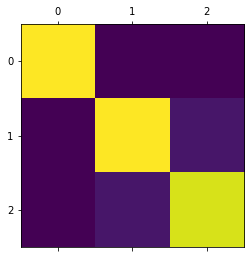

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

<h3>Exercise 1.3: Using the generated confusion matrix, compute the following:<br> Recall of class 0: 1<br>
Precision of class 1: 94%<br>
Positive True of class 2: 94% <br>
Accuracy of all classes: 96% </h3>

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



## Visualize Decision Trees
### (CART Method)


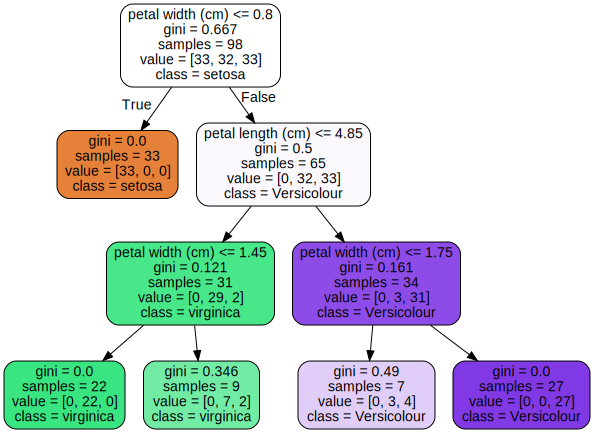

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['setosa','virginica','Versicolour']
    # Obtaining plot data.
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    # Generating plot.
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, df, 'Variety', le, 'Iris')
tree_graph

## Naive Bayes
In this example, you can use the dummy dataset with three columns: weather, temperature, and play. The first two are features(weather, temperature) and the other is the label.

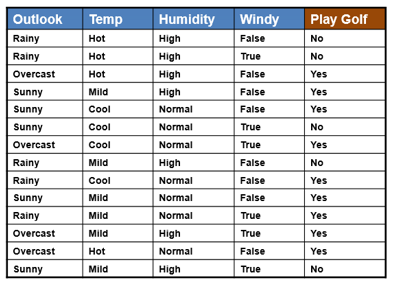

In [9]:
from IPython.display import Image
Image("C:\\naive_bayes_data.png")

### Exercise 2.1: Load into dataframe only “Outlook”, “Temp” as descriptive features and “Play Golf” as target class?  

In [10]:

# Assigning features and label variables
weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
         'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
         'Overcast','Sunny']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'
      'Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [16]:

import pandas as pd
data= {'weather': ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
                   'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                   'Overcast','Sunny'],
      'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
                'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
      'play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

data= pd.DataFrame(data)
data

,weather,temp,play
0,Rainy,Hot,No
1,Rainy,Hot,No
2,Overcast,Hot,Yes
3,Sunny,Mild,Yes
4,Sunny,Cool,Yes
5,Sunny,Cool,No
6,Overcast,Cool,Yes
7,Rainy,Mild,No
8,Rainy,Cool,Yes
9,Sunny,Mild,Yes


### Exercise 2.2: Encode the remain data using LabelEncoder method()? Write the output here! 

In [17]:
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(data['weather'])
print (wheather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [18]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(data['temp'])
label=le.fit_transform(data['play'])
print ("Weather:",wheather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## Combine all descriptive features in single variable

In [27]:
#Combinig weather and temp into single listof tuples
features=zip(wheather_encoded,temp_encoded)
features_ls= list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


## Bernoulli Banive Bayes


In [28]:
#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import GaussianNB, BernoulliNB

#Create a Bernoulli Classifier
model = BernoulliNB()

# Train the model using the training sets
model.fit(features_ls,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]


### Exercise 2.3: Repeat the experiment again but now using Gaussian Naïve Bayes (just replace model= GaussianNB())! Is the result the same?<br><br><br> <i> YES </i>

## Gaussian Naive Bayes

In [29]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features_ls,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1]
